# 1. Supervised learning - 1.1 Linear models

In [17]:
#먼저 패키지를 설치하고
# !pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
# Image("poisson_gamma_tweedie_distributions.png") =>밑에서 실행

### https://scikit-learn.org/stable/modules/linear_model.html

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if  $\hat{y}$ is the predicted value.
$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$ 

Across the module, we designate the vector w = (w1, ..., wp) as coef_ and w0 as intercept_.

To perform classification with generalized linear models, see Logistic regression.

In [49]:
# Latex사용은 $ $로 묶거나 $$ $$ 로 묶어서 사용

## 1.1.1. Ordinary Least Squares

LinearRegression fits a linear model with coefficients  $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

$$ \min_{w} || X w - y||_2^2  $$

### plot_ols.ipynb에서 별도실행

LinearRegression will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef_ member:

In [50]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression()

In [51]:
reg.coef_

array([0.5, 0.5])

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix X have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

multicollinearity: 다중공선성문제는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제. 독립변수들간에 정확한 선형관계가 존재하는 완전공선성의 경우와 독립변수들간에 높은 선형관계가 존재하는 다중공선성으로 구분. 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석시 부정적인 영향을 미치는 현상

Examples:

Linear Regression Example

In [52]:
%matplotlib inline


# Linear Regression Example
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


In [53]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
datasets

<module 'sklearn.datasets' from 'C:\\Users\\cool-com\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

In [54]:
linear_model

<module 'sklearn.linear_model' from 'C:\\Users\\cool-com\\anaconda3\\lib\\site-packages\\sklearn\\linear_model\\__init__.py'>

In [55]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

In [56]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [57]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X  # 442*10

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cool-com\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_data.csv.gz'

In [ ]:
diabetes_y  # 442*1

In [58]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2] # 3번째 열로 새축 구성
diabetes_X

NameError: name 'diabetes_X' is not defined

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [59]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [60]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

NameError: name 'diabetes_X_train' is not defined

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)

In [61]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

NameError: name 'diabetes_y_test' is not defined

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## 1.1.1.1. Non-Negative Least Squares

It is possible to constrain all the coefficients to be non-negative, which may be useful when they represent some physical or naturally non-negative quantities (e.g., frequency counts or prices of goods). LinearRegression accepts a boolean positive parameter: when set to True Non-Negative Least Squares are then applied.

Examples:

Non-negative least squares

# 1.1.2. Ridge regression and classification

## 1.1.2.1. Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$$ \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 $$

## plot_ridge_path.ipynb에서 별도 실행

The complexity parameter $ \alpha \geq 0 $ controls the amount of shrinkage: the larger the value of $ \alpha $, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

As with other linear models, Ridge will take in its fit method arrays X, y and will store the coefficients $ w $  of the linear model in its coef_ member:

In [62]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [63]:
reg.coef_

array([0.34545455, 0.34545455])

In [64]:
reg.intercept_

0.1363636363636364

Note that the class Ridge allows for the user to specify that the solver be automatically chosen by setting solver="auto". When this option is specified, Ridge will choose between the "lbfgs", "cholesky", and "sparse_cg" solvers. Ridge will begin checking the conditions shown in the following table from top to bottom. If the condition is true, the corresponding solver is chosen.

### Solver,          Condition

### ‘lbfgs’,          The positive=True option is specified.

### ‘cholesky’,   The input array X is not sparse.

### ‘sparse_cg’,  None of the above conditions are fulfilled.

In [65]:
%matplotlib inline


# Plot Ridge coefficients as a function of the regularization

Shows the effect of collinearity in the coefficients of an estimator.

.. currentmodule:: sklearn.linear_model

:class:`Ridge` Regression is the estimator used in this example.
Each color represents a different feature of the
coefficient vector, and this is displayed as a function of the
regularization parameter.

This example also shows the usefulness of applying Ridge regression
to highly ill-conditioned(조건이 나쁜) matrices. For such matrices, a slight
change in the target variable can cause huge variances in the
calculated weights. In such cases, it is useful to set a certain
regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the
squared loss function(손실함수, 평균제곱근오차) and the coefficients tend to zero.
At the end of the path, as alpha tends toward zero
and the solution tends towards the ordinary least squares, coefficients
exhibit big oscillations(진동). In practise it is necessary to tune alpha
in such a way that a balance is maintained between both.


In [66]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [67]:
np.arange(0, 10)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [68]:
(np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [69]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [70]:
y = np.ones(10)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Compute paths



In [71]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
alphas

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [72]:
alphas.shape

(200,)

In [73]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
ridge

Ridge(alpha=0.01, fit_intercept=False)

In [74]:
coefs

[array([   2.64506158,  -27.60370165,    7.99285619,  133.67551402,
          18.04324615, -123.85505338, -175.62009081, -113.78634109,
          45.15378754,  274.02305851]),
 array([   2.77495224,  -30.1209692 ,   17.90672494,  125.42571617,
          10.71783546, -122.86634349, -168.64642961, -106.59634373,
          46.70074869,  265.22301165]),
 array([   2.8964128 ,  -32.48097779,   27.21871697,  117.65917064,
           3.83377586, -121.92542172, -162.0788977 ,  -99.83164507,
          48.15084232,  256.93547839]),
 array([   3.0095957 ,  -34.68696546,   35.94231884,  110.36420355,
          -2.61959776, -121.0307006 , -155.90694738,  -93.48139569,
          49.50638918,  249.14682982]),
 array([   3.11468948,  -36.74289336,   44.09395174,  103.52651939,
          -8.65489592, -120.18030045, -150.11799678,  -87.5326181 ,
          50.77012538,  241.84083979]),
 array([   3.21190939,  -38.65326602,   51.69224979,   97.12992087,
         -14.28643035, -119.37200469, -144.69786258,

In [75]:
a

0.01

## Display results



<AxesSubplot:>

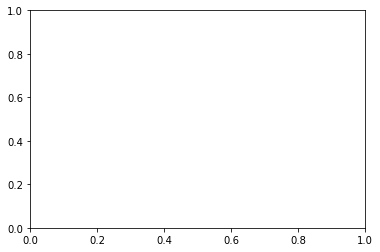

In [76]:
ax = plt.gca() # 현재 Axes 객체를 반환
ax

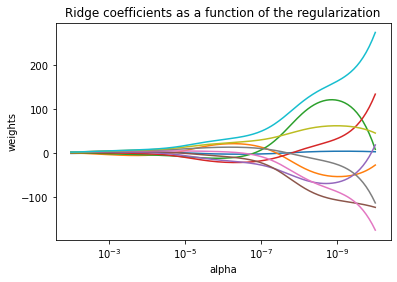

In [77]:
ax = plt.gca() # 현재 Axes 객체를 반환
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight") # 'tight': 모든 데이터를 볼 수 있을 정도로 축의 범위를 충분히 크게 설정
plt.show()

## 1.1.2.2. Classification

The Ridge regressor has a classifier variant: RidgeClassifier. This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above. The predicted class corresponds to the sign of the regressor’s prediction. For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.
Penalized Regression(규제): 부가정보를 손실에 대해 과대적합 문제를 방지하는 방법, 복잡도에 대한 페널티를 유도해 모델 파라미터의 값을 감소
It might seem questionable to use a (penalized) Least Squares loss to fit a classification model instead of the more traditional logistic or hinge losses. However, in practice, all those models can lead to similar cross-validation scores in terms of accuracy or precision/recall, while the penalized least squares loss used by the RidgeClassifier allows for a very different choice of the numerical solvers with distinct computational performance profiles.

The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes because it can compute the projection matrix $ (X^T X)^{-1} X^T $ only once.

This classifier is sometimes referred to as a Least Squares Support Vector Machines with a linear kernel.

### plot_linear_model_coefficient_interpretation.ipynb에서 별도 실행

## 1.1.2.3. Ridge Complexity

This method has the same order of complexity as Ordinary Least Squares.

## 1.1.2.4. Setting the regularization parameter: leave-one-out Cross-Validation

RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Leave-One-Out Cross-Validation:

In [1]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [2]:
reg.alpha_

0.01

Specifying the value of the cv attribute will trigger the use of cross-validation with GridSearchCV, for example cv=10 for 10-fold cross-validation, rather than Leave-One-Out Cross-Validation.

References

“Notes on Regularized Least Squares”, Rifkin & Lippert (technical report, course slides).

## 1.1.3. Lasso

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

$$ \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$

The lasso estimate thus solves the minimization of the least-squares penalty with $ \alpha ||w||_1 $ added, where $\alpha$  is a constant $ ||w||_1$ and  is the $\ell_1$-norm of the coefficient vector.

The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients. See Least Angle Regression for another implementation:

In [4]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1)

In [5]:
reg.predict([[1, 1]])

array([0.8])

The function lasso_path is useful for lower-level tasks, as it computes the coefficients along the full path of possible values.

Examples:

Lasso and Elastic Net for Sparse Signals

Compressive sensing: tomography reconstruction with L1 prior (Lasso)

Common pitfalls in the interpretation of coefficients of linear models

Note Feature selection with Lasso
As the Lasso regression yields sparse models, it can thus be used to perform feature selection, as detailed in L1-based feature selection.

The following two references explain the iterations used in the coordinate descent solver of scikit-learn, as well as the duality gap computation used for convergence control.

References

“Regularization Path For Generalized linear Models by Coordinate Descent”, Friedman, Hastie & Tibshirani, J Stat Softw, 2010 (Paper).

“An Interior-Point Method for Large-Scale L1-Regularized Least Squares,” S. J. Kim, K. Koh, M. Lustig, S. Boyd and D. Gorinevsky, in IEEE Journal of Selected Topics in Signal Processing, 2007 (Paper)

### plot_lasso_model_selection.ipynb에서 별도실행

Mathematical details

The definition of AIC (and thus BIC) might differ in the literature. In this section, we give more information regarding the criterion computed in scikit-learn. The AIC criterion is defined as:
$$ AIC = -2 \log(\hat{L}) + 2 d $$
where $\hat{L}$ is the maximum likelihood of the model and  $d$ is the number of parameters (as well referred to as degrees of freedom in the previous section).

The definition of BIC replace the constant $2$ by $\log(N)$:
$$ BIC = -2 \log(\hat{L}) + \log(N) d $$
where $ N $ is the number of samples.

For a linear Gaussian model, the maximum log-likelihood is defined as:
$$ \log(\hat{L}) = - \frac{n}{2} \log(2 \pi) - \frac{n}{2} \ln(\sigma^2) - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{2\sigma^2} $$
 
where $ \sigma^2 $ is an estimate of the noise variance, $ y_i $ and  $ \hat{y}_i $ are respectively the true and predicted targets, and  $ n $ is the number of samples.

Plugging the maximum log-likelihood in the AIC formula yields:
$$ AIC = n \log(2 \pi \sigma^2) + \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sigma^2} + 2 d $$
 
The first term of the above expression is sometimes discarded since it is a constant when $\sigma^2$ is provided. In addition, it is sometimes stated that the AIC is equivalent to the $ C_p $ statistic [12]. In a strict sense, however, it is equivalent only up to some constant and a multiplicative factor.

At last, we mentioned above that $ \sigma^2$ is an estimate of the noise variance. In LassoLarsIC when the parameter noise_variance is not provided (default), the noise variance is estimated via the unbiased estimator [13] defined as:
$$ \sigma^2 = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - p}$$
 
where $ p$ is the number of features and $ \hat{y}_i $ is the predicted target using an ordinary least squares regression. Note, that this formula is valid only when n_samples > n_features.

Examples:

Lasso model selection: AIC-BIC / cross-validation

Lasso model selection via information criteria

References

[12]Zou, Hui, Trevor Hastie, and Robert Tibshirani. “On the degrees of freedom of the lasso.” The Annals of Statistics 35.5 (2007): 2173-2192.

[13]Cherkassky, Vladimir, and Yunqian Ma. “Comparison of model selection for regression.” Neural computation 15.7 (2003): 1691-1714.

## Comparison with the regularization parameter of SVM
The equivalence between alpha and the regularization parameter of SVM, C is given by alpha = 1 / C or alpha = 1 / (n_samples * C), depending on the estimator and the exact objective function optimized by the model.

## 1.1.4. Multi-task Lasso

The MultiTaskLasso is a linear model that estimates sparse coefficients for multiple regression problems jointly: y is a 2D array, of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks.

The following figure compares the location of the non-zero entries in the coefficient matrix W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yield scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.

### plot_multi_task_lasso_support.ipynb에서 별도실행

Examples:

Joint feature selection with multi-task Lasso

Mathematically, it consists of a linear model trained with a mixed $\ell_1$ $ \ell_2$-norm for regularization. The objective function to minimize is:
$$ \min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}} ^ 2 + \alpha ||W||_{21}} $$

where $ \text{Fro} $ indicates the Frobenius norm
$$ ||A||_{\text{Fro}} = \sqrt{\sum_{ij} a_{ij}^2}$$
and $ \ell_1$ $ \ell_2$ reads
$$ ||A||_{2 1} = \sum_i \sqrt{\sum_j a_{ij}^2}.$$ 
The implementation in the class MultiTaskLasso uses coordinate descent as the algorithm to fit the coefficients.

## 1.1.5. Elastic-Net

ElasticNet is a linear regression model trained with both $ \ell_1$ and $ \ell_2$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the $ \ell_1$ and $ \ell_2$ using the l1_ratio parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case
$$ \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2} $$

### plot_lasso_coordinate_descent_path.ipynb에서 별도실행

The class ElasticNetCV can be used to set the parameters alpha ($ \alpha$) and l1_ratio ($ \rho$) by cross-validation.

Examples:

Lasso and Elastic Net for Sparse Signals

Lasso and Elastic Net

The following two references explain the iterations used in the coordinate descent solver of scikit-learn, as well as the duality gap computation used for convergence control.

References

“Regularization Path For Generalized linear Models by Coordinate Descent”, Friedman, Hastie & Tibshirani, J Stat Softw, 2010 (Paper).

“An Interior-Point Method for Large-Scale L1-Regularized Least Squares,” S. J. Kim, K. Koh, M. Lustig, S. Boyd and D. Gorinevsky, in IEEE Journal of Selected Topics in Signal Processing, 2007 (Paper)

## 1.1.6. Multi-task Elastic-Net

The MultiTaskElasticNet is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: Y is a 2D array of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks.

Mathematically, it consists of a linear model trained with a mixed $ \ell_1$ $\ell_2 $-norm and $ \ell_2$-norm for regularization. The objective function to minimize is:
$$ \min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}}^2 + \alpha \rho ||W||_{2 1} +
\frac{\alpha(1-\rho)}{2} ||W||_{\text{Fro}}^2}$$
 
The implementation in the class MultiTaskElasticNet uses coordinate descent as the algorithm to fit the coefficients.

The class MultiTaskElasticNetCV can be used to set the parameters alpha ($\alpha$) and l1_ratio ($ \rho$) by cross-validation.

## 1.1.7. Least Angle Regression

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

The advantages of LARS are:

It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.

It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares.

It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.

If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.

It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:

Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

The LARS model can be used via the estimator Lars, or its low-level implementation lars_path or lars_path_gram.

## 1.1.8. LARS Lasso

LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

### plot_lasso_lars.ipynb에서 별도실행

In [6]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

LassoLars(alpha=0.1)

In [7]:
reg.coef_

array([0.6, 0. ])

Examples:

Lasso path using LARS

The Lars algorithm provides the full path of the coefficients along the regularization parameter almost for free, thus a common operation is to retrieve the path with one of the functions lars_path or lars_path_gram.

### 1.1.8.1. Mathematical formulation

The algorithm is similar to forward stepwise regression, but instead of including features at each step, the estimated coefficients are increased in a direction equiangular to each one’s correlations with the residual.

Instead of giving a vector result, the LARS solution consists of a curve denoting the solution for each value of the 
 norm of the parameter vector. The full coefficients path is stored in the array coef_path_ of shape (n_features, max_features + 1). The first column is always zero.

References:

Original Algorithm is detailed in the paper Least Angle Regression by Hastie et al.

## 1.1.9. Orthogonal Matching Pursuit (OMP)

OrthogonalMatchingPursuit and orthogonal_mp implement the OMP algorithm for approximating the fit of a linear model with constraints imposed on the number of non-zero coefficients (ie. the $ \ell_0$ pseudo-norm).

Being a forward feature selection method like Least Angle Regression, orthogonal matching pursuit can approximate the optimum solution vector with a fixed number of non-zero elements:
$$ \underset{w}{\operatorname{arg\,min\,}}  ||y - Xw||_2^2 \text{ subject to } ||w||_0 \leq n_{\text{nonzero\_coefs}}$$
 
Alternatively, orthogonal matching pursuit can target a specific error instead of a specific number of non-zero coefficients. This can be expressed as:
$$ \underset{w}{\operatorname{arg\,min\,}} ||w||_0 \text{ subject to } ||y-Xw||_2^2 \leq \text{tol}$$
 
OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. It is similar to the simpler matching pursuit (MP) method, but better in that at each iteration, the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.

Examples:

Orthogonal Matching Pursuit

References:

https://www.cs.technion.ac.il/~ronrubin/Publications/KSVD-OMP-v2.pdf

Matching pursuits with time-frequency dictionaries, S. G. Mallat, Z. Zhang,

## 1.1.10. Bayesian Regression

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

This can be done by introducing uninformative priors over the hyper parameters of the model. The $ \ell_{2}$ regularization used in Ridge regression and classification is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the coefficients $w$
 with precision $ \lambda^{-1}$. Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

To obtain a fully probabilistic model, the output $y $ is assumed to be Gaussian distributed around $ y$:

where $ \alpha$ is again treated as a random variable that is to be estimated from the data.

The advantages of Bayesian Regression are:

It adapts to the data at hand.

It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:

Inference of the model can be time consuming.

References

A good introduction to Bayesian methods is given in C. Bishop: Pattern Recognition and Machine learning

Original Algorithm is detailed in the book Bayesian learning for neural networks by Radford M. Neal

## 1.1.10.1. Bayesian Ridge Regression

BayesianRidge estimates a probabilistic model of the regression problem as described above. The prior for the coefficient $ w$ is given by a spherical Gaussian:
$$ p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})$$

The priors over $ \alpha$ and $ \lambda$are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian. The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge.

The parameters $ w$, $ \alpha$ and $ \lambda$ are estimated jointly during the fit of the model, the regularization parameters  $ \alpha$ and $ \lambda$ being estimated by maximizing the log marginal likelihood. The scikit-learn implementation is based on the algorithm described in Appendix A of (Tipping, 2001) where the update of the parameters  $ \alpha$ and $ \lambda$ is done as suggested in (MacKay, 1992). The initial value of the maximization procedure can be set with the hyperparameters alpha_init and lambda_init.

There are four more hyperparameters,$ \alpha_1$,$ \alpha_2$, $ \lambda_1$ and $ \lambda_2$ of the gamma prior distributions over $ \alpha$ and $ \lambda$
These are usually chosen to be non-informative. By default $ \alpha_1 = \alpha_2 =  \lambda_1 = \lambda_2 = 10^{-6}$.

Bayesian Ridge Regression is used for regression:

In [8]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge()

After being fitted, the model can then be used to predict new values:

In [9]:
reg.predict([[1, 0.]])

array([0.50000013])

The coefficients $\omega$ of the model can be accessed:

In [10]:
reg.coef_

array([0.49999993, 0.49999993])

Due to the Bayesian framework, the weights found are slightly different to the ones found by Ordinary Least Squares. However, Bayesian Ridge Regression is more robust to ill-posed problems.

Examples:

Curve Fitting with Bayesian Ridge Regression

References:

Section 3.3 in Christopher M. Bishop: Pattern Recognition and Machine Learning, 2006

David J. C. MacKay, Bayesian Interpolation, 1992.

Michael E. Tipping, Sparse Bayesian Learning and the Relevance Vector Machine, 2001.

## 1.1.10.2. Automatic Relevance Determination - ARD

The Automatic Relevance Determination (as being implemented in ARDRegression) is a kind of linear model which is very similar to the Bayesian Ridge Regression, but that leads to sparser coefficients $ \omega$ [1] [2].

ARDRegression poses a different prior over  $ \omega$: it drops the spherical Gaussian distribution for a centered elliptic Gaussian distribution. This means each coefficient $ w_{i}$ can itself be drawn from a Gaussian distribution, centered on zero and with a precision $ \lambda_{i}$:
$$ p(w|\lambda) = \mathcal{N}(w|0,A^{-1})$$
with $ A$ being a positive definite diagonal matrix and $ \text{diag}(A) = \lambda = \{\lambda_{1},...,\lambda_{p}\}$.

In contrast to the Bayesian Ridge Regression, each coordinate of $ w_{i}$ has its own standard deviation $ \frac{1}{\lambda_i}$. The prior over all $ \lambda_i$ is chosen to be the same gamma distribution given by the hyperparameters $\lambda_1$ and $\lambda_2$.

ARD is also known in the literature as Sparse Bayesian Learning and Relevance Vector Machine [3] [4]. For a worked-out comparison between ARD and Bayesian Ridge Regression, see the example below.

Examples:

Comparing Linear Bayesian Regressors

References:

[1]Christopher M. Bishop: Pattern Recognition and Machine Learning, Chapter 7.2.1

[2]David Wipf and Srikantan Nagarajan: A New View of Automatic Relevance Determination

[3]Michael E. Tipping: Sparse Bayesian Learning and the Relevance Vector Machine

[4]Tristan Fletcher: Relevance Vector Machines Explained

## 1.1.11. Logistic regression

The logistic regression is implemented in LogisticRegression. Despite its name, it is implemented as a linear model for classification rather than regression in terms of the scikit-learn/ML nomenclature. The logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional $\ell_1$,$ \ell_2$  or Elastic-Net regularization.

Note: Regularization
Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability. No regularization amounts to setting C to a very high value.

Note: Logistic Regression as a special case of the Generalized Linear Models (GLM)
Logistic regression is a special case of Generalized Linear Models with a Binomial / Bernoulli conditional distribution and a Logit link. The numerical output of the logistic regression, which is the predicted probability, can be used as a classifier by applying a threshold (by default 0.5) to it. This is how it is implemented in scikit-learn, so it expects a categorical target, making the Logistic Regression a classifier.

## 1.1.11.1. Binary Case

For notational ease, we assume that the target $ y_i$ takes values in the set $ \{0, 1\}$ for data point $ i$. Once fitted, the predict_proba method of LogisticRegression predicts the probability of the positive class $ P(y_i=1|X_i)$ as
$$ \hat{p}(X_i) = \operatorname{expit}(X_i w + w_0) = \frac{1}{1 + \exp(-X_i w - w_0)}.$$
 
As an optimization problem, binary class logistic regression with regularization term $ r(w)$ minimizes the following cost function:
$$ \min_{w} C \sum_{i=1}^n \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right) + r(w).$$
 
We currently provide four choices for the regularization term $ r(w)$ via the penalty argument:

penalty  -----  $r(w) $

None   ------- $ 0$

$\ell_1$ ---------   $ \|w\|_1$ 

$\ell_2$  ---------   $ \frac{1}{2}\|w\|_2^2 = \frac{1}{2}w^T w $

ElasticNet  --  $ \frac{1 - \rho}{2}w^T w + \rho \|w\|_1$

For ElasticNet, $\rho$ (which corresponds to the l1_ratio parameter) controls the strength of $\ell_1 $ regularization vs.$\ell_2 $ regularization. Elastic-Net is equivalent to $\ell_1 $ when $ \rho = 1$ and equivalent to $\ell_2 $ when $\rho=0$.

## 1.1.11.2. Multinomial Case

The binary case can be extended to $ K$ classes leading to the multinomial logistic regression, see also log-linear model.

Note It is possible to parameterize a $ K$-class classification model using only $K-1$ weight vectors, leaving one class probability fully determined by the other class probabilities by leveraging the fact that all class probabilities must sum to one. We deliberately choose to overparameterize the model using $ K$ weight vectors for ease of implementation and to preserve the symmetrical inductive bias regarding ordering of classes, see [16]. This effect becomes especially important when using regularization. The choice of overparameterization can be detrimental for unpenalized models since then the solution may not be unique, as shown in [16].
Let $ y_i \in {1, \ldots, K}$ be the label (ordinal) encoded target variable for observation $i$. Instead of a single coefficient vector, we now have a matrix of coefficients $ W$ where each row vector $W_k$ corresponds to class $k$. We aim at predicting the class probabilities $ P(y_i=k|X_i)$ via predict_proba as:
$$ \hat{p}_k(X_i) = \frac{\exp(X_i W_k + W_{0, k})}{\sum_{l=0}^{K-1} \exp(X_i W_l + W_{0, l})}.$$

The objective for the optimization becomes
$$ \min_W -C \sum_{i=1}^n \sum_{k=0}^{K-1} [y_i = k] \log(\hat{p}_k(X_i)) + r(W).$$
 
Where $ [P]$ represents the Iverson bracket which evaluates to $ 0$ if $ P$ is false, otherwise it evaluates to $1$. We currently provide four choices for the regularization term $r(W)$ via the penalty argument:

penalty  -----  $r(W) $

None   ------- $ 0$

$\ell_1$ ---------   $ \|W\|_{1,1} = \sum_{i=1}^n\sum_{j=1}^{K}|W_{i,j}|$ 

$\ell_2$  ---------   $ \frac{1}{2}\|W\|_F^2 = \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^{K} W_{i,j}^2 $

ElasticNet  --  $ \frac{1 - \rho}{2}\|W\|_F^2 + \rho \|W\|_{1,1}$


## 1.1.11.3. Solvers

The solvers implemented in the class LogisticRegression are “lbfgs”, “liblinear”, “newton-cg”, “newton-cholesky”, “sag” and “saga”:

The solver “liblinear” uses a coordinate descent (CD) algorithm, and relies on the excellent C++ LIBLINEAR library, which is shipped with scikit-learn. However, the CD algorithm implemented in liblinear cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes. This happens under the hood, so LogisticRegression instances using this solver behave as multiclass classifiers. For $\ell_1$ regularization sklearn.svm.l1_min_c allows to calculate the lower bound for C in order to get a non “null” (all feature weights to zero) model.

The “lbfgs”, “newton-cg” and “sag” solvers only support $\ell_2$ regularization or no regularization, and are found to converge faster for some high-dimensional data. Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model [5], which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

The “sag” solver uses Stochastic Average Gradient descent [6]. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

The “saga” solver [7] is a variant of “sag” that also supports the non-smooth penalty="l1". This is therefore the solver of choice for sparse multinomial logistic regression. It is also the only solver that supports penalty="elasticnet".

The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm [8], which belongs to quasi-Newton methods. As such, it can deal with a wide range of different training data and is therefore the default solver. Its performance, however, suffers on poorly scaled datasets and on datasets with one-hot encoded categorical features with rare categories.

The “newton-cholesky” solver is an exact Newton solver that calculates the hessian matrix and solves the resulting linear system. It is a very good choice for n_samples >> n_features, but has a few shortcomings: Only 
 regularization is supported. Furthermore, because the hessian matrix is explicitly computed, the memory usage has a quadratic dependency on n_features as well as on n_classes. As a consequence, only the one-vs-rest scheme is implemented for the multiclass case.

For a comparison of some of these solvers, see [9].

The following table summarizes the penalties supported by each solver:

Penalties---------------------------‘lbfgs’----‘liblinear’----‘newton-cg’----‘newton-cholesky’----‘sag’----‘saga’

Multinomial + L2 penalty --------yes------------no------------yes-------------------no--------------yes-------yes

OVR + L2 penalty  ----------------yes-----------yes------------yes------------------yes--------------yes-------yes

Multinomial + L1 penalty  -------no------------no-------------no-------------------no---------------no-------yes

OVR + L1 penalty    ---------------no-----------yes-------------no-------------------no---------------no-------yes

Elastic-Net     ------------------------no------------no-------------no-------------------no---------------no-------yes

No penalty (‘none’)  --------------yes------------no------------yes------------------yes--------------yes-------yes

Behaviors

Penalize the intercept (bad) ---no-----------yes-------------no-------------------no---------------no--------no

Faster for large datasets   -------no-----------yes-------------no-------------------no--------------yes-------yes

Robust to unscaled datasets  --yes-----------yes------------yes------------------yes---------------no--------no

The “lbfgs” solver is used by default for its robustness. For large datasets the “saga” solver is usually faster. For large dataset, you may also consider using SGDClassifier with loss="log_loss", which might be even faster but requires more tuning.

Examples:

L1 Penalty and Sparsity in Logistic Regression

Regularization path of L1- Logistic Regression

Plot multinomial and One-vs-Rest Logistic Regression

Multiclass sparse logistic regression on 20newgroups

MNIST classification using multinomial logistic + L1

Differences from liblinear:

There might be a difference in the scores obtained between LogisticRegression with solver=liblinear or LinearSVC and the external liblinear library directly, when fit_intercept=False and the fit coef_ (or) the data to be predicted are zeroes. This is because for the sample(s) with decision_function zero, LogisticRegression and LinearSVC predict the negative class, while liblinear predicts the positive class. Note that a model with fit_intercept=False and having many samples with decision_function zero, is likely to be a underfit, bad model and you are advised to set fit_intercept=True and increase the intercept_scaling.

Note Feature selection with sparse logistic regression
A logistic regression with $ \ell_1$ penalty yields sparse models, and can thus be used to perform feature selection, as detailed in L1-based feature selection.

Note P-value estimation
It is possible to obtain the p-values and confidence intervals for coefficients in cases of regression without penalization. The statsmodels package natively supports this. Within sklearn, one could use bootstrapping instead as well.

LogisticRegressionCV implements Logistic Regression with built-in cross-validation support, to find the optimal C and l1_ratio parameters according to the scoring attribute. The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data, due to warm-starting (see Glossary).

References:

[5]Christopher M. Bishop: Pattern Recognition and Machine Learning, Chapter 4.3.4

[6]Mark Schmidt, Nicolas Le Roux, and Francis Bach: Minimizing Finite Sums with the Stochastic Average Gradient.

[7]Aaron Defazio, Francis Bach, Simon Lacoste-Julien: SAGA: A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives.

[8]https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

[9]Thomas P. Minka “A comparison of numerical optimizers for logistic regression”

[16] (1,2) Simon, Noah, J. Friedman and T. Hastie. “A Blockwise Descent Algorithm for Group-penalized Multiresponse and Multinomial Regression.”

## 1.1.12. Generalized Linear Models

Generalized Linear Models (GLM) extend linear models in two ways [10]. First, the predicted values $ \hat{y}$ are linked to a linear combination of the input variables $ X$ via an inverse link function $ h$ as
$$ \hat{y}(w, X) = h(Xw).$$

Secondly, the squared loss function is replaced by the unit deviance $d$ of a distribution in the exponential family (or more precisely, a reproductive exponential dispersion model (EDM) [11]).

The minimization problem becomes:
$$ \min_{w} \frac{1}{2 n_{\text{samples}}} \sum_i d(y_i, \hat{y}_i) + \frac{\alpha}{2} ||w||_2^2,$$

where $ \alpha$ is the L2 regularization penalty. When sample weights are provided, the average becomes a weighted average.

The following table lists some specific EDMs and their unit deviance :

Distribution----Target Domain----Unit Deviance $d(y, \hat{y})$

Normal-----------$y \in (-\infty, \infty)$------$(y-\hat{y})^2 $

Bernoulli-------$y \in \{0, 1\}$-----------$2({y}\log\frac{y}{\hat{y}}+({1}-{y})\log\frac{{1}-{y}}{{1}-\hat{y}})$

Categorical-----$y \in \{0, 1, ..., k\}$--$2\sum_{i \in \{0, 1, ..., k\}} I(y = i) y_\text{i}\log\frac{I(y = i)}{\hat{I(y = i)}}$

Poisson---------$y \in [0, \infty)$------$2(y\log\frac{y}{\hat{y}}-y+\hat{y})$

Gamma------------$y \in (0, \infty)$------$2(\log\frac{y}{\hat{y}}+\frac{y}{\hat{y}}-1)$

Inverse Gaussian--$y \in (0, \infty)$------$\frac{(y-\hat{y})^2}{y\hat{y}^2}$

The Probability Density Functions (PDF) of these distributions are illustrated in the following figure,

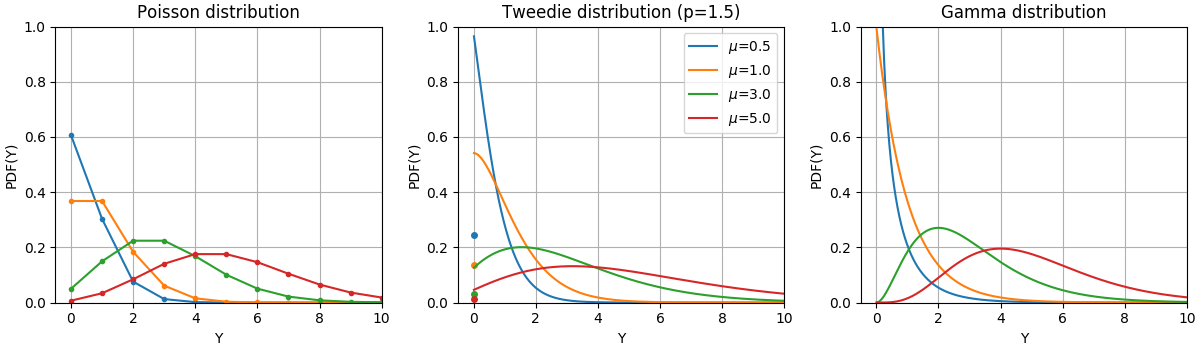

In [18]:
Image("poisson_gamma_tweedie_distributions.png")

PDF of a random variable Y following Poisson, Tweedie (power=1.5) and Gamma distributions with different mean values ($\mu$). Observe the point mass at $Y=0 $ for the Poisson distribution and the Tweedie (power=1.5) distribution, but not for the Gamma distribution which has a strictly positive target domain.

The Bernoulli distribution is a discrete probability distribution modelling a Bernoulli trial - an event that has only two mutually exclusive outcomes. The Categorical distribution is a generalization of the Bernoulli distribution for a categorical random variable. While a random variable in a Bernoulli distribution has two possible outcomes, a Categorical random variable can take on one of K possible categories, with the probability of each category specified separately.

The choice of the distribution depends on the problem at hand:

If the target values $y$ are counts (non-negative integer valued) or relative frequencies (non-negative), you might use a Poisson distribution with a log-link.

If the target values are positive valued and skewed, you might try a Gamma distribution with a log-link.

If the target values seem to be heavier tailed than a Gamma distribution, you might try an Inverse Gaussian distribution (or even higher variance powers of the Tweedie family).

If the target values $y$ are probabilities, you can use the Bernoulli distribution. The Bernoulli distribution with a logit link can be used for binary classification. The Categorical distribution with a softmax link can be used for multiclass classification.

Examples of use cases include:

Agriculture / weather modeling: number of rain events per year (Poisson), amount of rainfall per event (Gamma), total rainfall per year (Tweedie / Compound Poisson Gamma).

Risk modeling / insurance policy pricing: number of claim events / policyholder per year (Poisson), cost per event (Gamma), total cost per policyholder per year (Tweedie / Compound Poisson Gamma).

Credit Default: probability that a loan can’t be payed back (Bernouli).

Fraud Detection: probability that a financial transaction like a cash transfer is a fraudulent transaction (Bernoulli).

Predictive maintenance: number of production interruption events per year (Poisson), duration of interruption (Gamma), total interruption time per year (Tweedie / Compound Poisson Gamma).

Medical Drug Testing: probability of curing a patient in a set of trials or probability that a patient will experience side effects (Bernoulli).

News Classification: classification of news articles into three categories namely Business News, Politics and Entertainment news (Categorical).

References:

[10] McCullagh, Peter; Nelder, John (1989). Generalized Linear Models, Second Edition. Boca Raton: Chapman and Hall/CRC. ISBN 0-412-31760-5.

[11] Jørgensen, B. (1992). The theory of exponential dispersion models and analysis of deviance. Monografias de matemática, no. 51. See also Exponential dispersion model.

## 1.1.12.1. Usage

TweedieRegressor implements a generalized linear model for the Tweedie distribution, that allows to model any of the above mentioned distributions using the appropriate power parameter. In particular:

power = 0: Normal distribution. Specific estimators such as Ridge, ElasticNet are generally more appropriate in this case.

power = 1: Poisson distribution. PoissonRegressor is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=1, link='log').

power = 2: Gamma distribution. GammaRegressor is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=2, link='log').

power = 3: Inverse Gaussian distribution.

The link function is determined by the link parameter.

Usage example:

In [19]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])

TweedieRegressor(alpha=0.5, link='log', power=1)

In [20]:
reg.coef_

array([0.24631611, 0.43370317])

In [21]:
reg.intercept_

-0.7638091359123443

Examples:

Poisson regression and non-normal loss

Tweedie regression on insurance claims

## 1.1.12.2. Practical considerations

The feature matrix X should be standardized before fitting. This ensures that the penalty treats features equally.

Since the linear predictor $Xw$ can be negative and Poisson, Gamma and Inverse Gaussian distributions don’t support negative values, it is necessary to apply an inverse link function that guarantees the non-negativeness. For example with link='log', the inverse link function becomes $h(Xw)=\exp(Xw)$.

If you want to model a relative frequency, i.e. counts per exposure (time, volume, …) you can do so by using a Poisson distribution and passing $y=\frac{\mathrm{counts}}{\mathrm{exposure}}$ as target values together with  $\mathrm{exposure}$ as sample weights. For a concrete example see e.g. Tweedie regression on insurance claims.

When performing cross-validation for the power parameter of TweedieRegressor, it is advisable to specify an explicit scoring function, because the default scorer TweedieRegressor.score is a function of power itself.

## 1.1.13. Stochastic Gradient Descent - SGD

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The partial_fit method allows online/out-of-core learning.

The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties. E.g., with loss="log", SGDClassifier fits a logistic regression model, while with loss="hinge" it fits a linear support vector machine (SVM).

References

Stochastic Gradient Descent

## 1.1.14. Perceptron

The Perceptron is another simple classification algorithm suitable for large scale learning. By default:

It does not require a learning rate.

It is not regularized (penalized).

It updates its model only on mistakes.

The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.

## 1.1.15. Passive Aggressive Algorithms

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter C.

For classification, PassiveAggressiveClassifier can be used with loss='hinge' (PA-I) or loss='squared_hinge' (PA-II). For regression, PassiveAggressiveRegressor can be used with loss='epsilon_insensitive' (PA-I) or loss='squared_epsilon_insensitive' (PA-II).

References:

“Online Passive-Aggressive Algorithms” K. Crammer, O. Dekel, J. Keshat, S. Shalev-Shwartz, Y. Singer - JMLR 7 (2006)

## 1.1.16. Robustness regression: outliers and modeling errors

Robust regression aims to fit a regression model in the presence of corrupt data: either outliers, or error in the model.

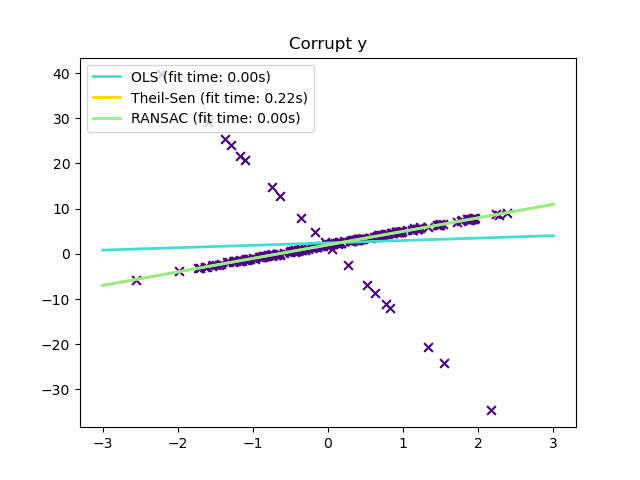

In [22]:
Image("sphx_glr_plot_theilsen_001.png")

## 1.1.16.1. Different scenario and useful concepts

There are different things to keep in mind when dealing with data corrupted by outliers:

### plot_robust_fit.ipynb을 별도 실행

An important notion of robust fitting is that of breakdown point: the fraction of data that can be outlying for the fit to start missing the inlying data.

Note that in general, robust fitting in high-dimensional setting (large n_features) is very hard. The robust models here will probably not work in these settings.

Trade-offs: which estimator?

Scikit-learn provides 3 robust regression estimators: RANSAC, Theil Sen and HuberRegressor.

HuberRegressor should be faster than RANSAC and Theil Sen unless the number of samples are very large, i.e n_samples >> n_features. This is because RANSAC and Theil Sen fit on smaller subsets of the data. However, both Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.

RANSAC is faster than Theil Sen and scales much better with the number of samples.

RANSAC will deal better with large outliers in the y direction (most common situation).

Theil Sen will cope better with medium-size outliers in the X direction, but this property will disappear in high-dimensional settings.

When in doubt, use RANSAC.

## 1.1.16.2. RANSAC: RANdom SAmple Consensus

RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete data set.

RANSAC is a non-deterministic algorithm producing only a reasonable result with a certain probability, which is dependent on the number of iterations (see max_trials parameter). It is typically used for linear and non-linear regression problems and is especially popular in the field of photogrammetric computer vision.

The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, which are e.g. caused by erroneous measurements or invalid hypotheses about the data. The resulting model is then estimated only from the determined inliers.

### plot_ransac.ipynb에서 별도 실행

Details of the algorithm
Each iteration performs the following steps:

Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).

Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).

Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than or equal to the residual_threshold are considered as inliers.

Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

These steps are performed either a maximum number of times (max_trials) or until one of the special stop criteria are met (see stop_n_inliers and stop_score). The final model is estimated using all inlier samples (consensus set) of the previously determined best model.

The is_data_valid and is_model_valid functions allow to identify and reject degenerate combinations of random sub-samples. If the estimated model is not needed for identifying degenerate cases, is_data_valid should be used as it is called prior to fitting the model and thus leading to better computational performance.

Examples:

Robust linear model estimation using RANSAC

Robust linear estimator fitting

References:

https://en.wikipedia.org/wiki/RANSAC

“Random Sample Consensus: A Paradigm for Model Fitting with Applications to Image Analysis and Automated Cartography” Martin A. Fischler and Robert C. Bolles - SRI International (1981)

“Performance Evaluation of RANSAC Family” Sunglok Choi, Taemin Kim and Wonpil Yu - BMVC (2009)

## 1.1.16.3. Theil-Sen estimator: generalized-median-based estimator

The TheilSenRegressor estimator uses a generalization of the median in multiple dimensions. It is thus robust to multivariate outliers. Note however that the robustness of the estimator decreases quickly with the dimensionality of the problem. It loses its robustness properties and becomes no better than an ordinary least squares in high dimension.

Examples:

Theil-Sen Regression

Robust linear estimator fitting

References:

https://en.wikipedia.org/wiki/Theil%E2%80%93Sen_estimator

### Theoretical considerations

TheilSenRegressor is comparable to the Ordinary Least Squares (OLS) in terms of asymptotic efficiency and as an unbiased estimator. In contrast to OLS, Theil-Sen is a non-parametric method which means it makes no assumption about the underlying distribution of the data. Since Theil-Sen is a median-based estimator, it is more robust against corrupted data aka outliers. In univariate setting, Theil-Sen has a breakdown point of about 29.3% in case of a simple linear regression which means that it can tolerate arbitrary corrupted data of up to 29.3%.

### plot_theilsen.ipynb에서 별도실행

The implementation of TheilSenRegressor in scikit-learn follows a generalization to a multivariate linear regression model [14] using the spatial median which is a generalization of the median to multiple dimensions [15].

In terms of time and space complexity, Theil-Sen scales according to

which makes it infeasible to be applied exhaustively to problems with a large number of samples and features. Therefore, the magnitude of a subpopulation can be chosen to limit the time and space complexity by considering only a random subset of all possible combinations.

Examples:

Theil-Sen Regression

References:

[14]
Xin Dang, Hanxiang Peng, Xueqin Wang and Heping Zhang: Theil-Sen Estimators in a Multiple Linear Regression Model.

[15]
Kärkkäinen and S. Äyrämö: On Computation of Spatial Median for Robust Data Mining.

## 1.1.16.4. Huber Regression

The HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It differs from TheilSenRegressor and RANSACRegressor because it does not ignore the effect of the outliers but gives a lesser weight to them.

### plot_huber_vs_ridge.ipynb에서 별도실행

The loss function that HuberRegressor minimizes is given by
$$ \min_{w, \sigma} {\sum_{i=1}^n\left(\sigma + H_{\epsilon}\left(\frac{X_{i}w - y_{i}}{\sigma}\right)\sigma\right) + \alpha {||w||_2}^2}$$
 
where
$$ \begin{split}H_{\epsilon}(z) = \begin{cases}
       z^2, & \text {if } |z| < \epsilon, \\
       2\epsilon|z| - \epsilon^2, & \text{otherwise}
\end{cases}\end{split}$$ 
 
It is advised to set the parameter epsilon to 1.35 to achieve 95% statistical efficiency.

### 1.1.16.5. Notes

The HuberRegressor differs from using SGDRegressor with loss set to huber in the following ways.

HuberRegressor is scaling invariant. Once epsilon is set, scaling X and y down or up by different values would produce the same robustness to outliers as before. as compared to SGDRegressor where epsilon has to be set again when X and y are scaled.

HuberRegressor should be more efficient to use on data with small number of samples while SGDRegressor needs a number of passes on the training data to produce the same robustness.

Examples:

HuberRegressor vs Ridge on dataset with strong outliers

References:

Peter J. Huber, Elvezio M. Ronchetti: Robust Statistics, Concomitant scale estimates, pg 172

Note that this estimator is different from the R implementation of Robust Regression (https://stats.oarc.ucla.edu/r/dae/robust-regression/) because the R implementation does a weighted least squares implementation with weights given to each sample on the basis of how much the residual is greater than a certain threshold.

## 1.1.17. Quantile Regression

Quantile regression estimates the median or other quantiles of $y$  conditional on $X$, while ordinary least squares (OLS) estimates the conditional mean.

As a linear model, the QuantileRegressor gives linear predictions $\hat{y}(w, X) = Xw$ for the $q$-th quantile, $q \in (0, 1)$. The weights or coefficients $w$ are then found by the following minimization problem:
$$ \min_{w} {\frac{1}{n_{\text{samples}}}
\sum_i PB_q(y_i - X_i w) + \alpha ||w||_1}.$$
 
This consists of the pinball loss (also known as linear loss), see also mean_pinball_loss,
$$ \begin{split}PB_q(t) = q \max(t, 0) + (1 - q) \max(-t, 0) =
\begin{cases}
    q t, & t > 0, \\
    0,    & t = 0, \\
    (q-1) t, & t < 0
\end{cases}\end{split}$$
 
and the L1 penalty controlled by parameter alpha, similar to Lasso.

As the pinball loss is only linear in the residuals, quantile regression is much more robust to outliers than squared error based estimation of the mean. Somewhat in between is the HuberRegressor.

Quantile regression may be useful if one is interested in predicting an interval instead of point prediction. Sometimes, prediction intervals are calculated based on the assumption that prediction error is distributed normally with zero mean and constant variance. Quantile regression provides sensible prediction intervals even for errors with non-constant (but predictable) variance or non-normal distribution.

### plot_quantile_regression.ipynb에서 별도실행

Based on minimizing the pinball loss, conditional quantiles can also be estimated by models other than linear models. For example, GradientBoostingRegressor can predict conditional quantiles if its parameter loss is set to "quantile" and parameter alpha is set to the quantile that should be predicted. See the example in Prediction Intervals for Gradient Boosting Regression.

Most implementations of quantile regression are based on linear programming problem. The current implementation is based on scipy.optimize.linprog.

Examples:

Quantile regression

References:

Koenker, R., & Bassett Jr, G. (1978). Regression quantiles. Econometrica: journal of the Econometric Society, 33-50.

Portnoy, S., & Koenker, R. (1997). The Gaussian hare and the Laplacian tortoise: computability of squared-error versus absolute-error estimators. Statistical Science, 12, 279-300.

Koenker, R. (2005). Quantile Regression. Cambridge University Press.

## 1.1.18. Polynomial regression: extending linear models with basis functions

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:
$$ \hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:
$$ \hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new set of features
$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

With this re-labeling of the data, our problem can be written
$$ \hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we considered above (i.e. the model is linear in 
) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

Here is an example of applying this idea to one-dimensional data, using polynomial features of varying degrees:

### plot_polynomial_interpolation.ipynb에서 별도실행

This figure is created using the PolynomialFeatures transformer, which transforms an input data matrix into a new data matrix of a given degree. It can be used as follows:

In [23]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [24]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

The features of X have been transformed from $[x_1, x_2]$ to $ [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]$, and can now be used within any linear model.

This sort of preprocessing can be streamlined with the Pipeline tools. A single object representing a simple polynomial regression can be created and used as follows:

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most 
 distinct features. These can be gotten from PolynomialFeatures with the setting interaction_only=True.

For example, when dealing with boolean features, $x_i^n = x_i$ for all $n$ and is therefore useless; but $x_i x_j$ represents the conjunction of two booleans. This way, we can solve the XOR problem with a linear classifier:

In [26]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
y

array([0, 1, 1, 0], dtype=int32)

In [27]:
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X

array([[1, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 1]])

In [28]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(X, y)

In [29]:
clf.predict(X)

array([0, 1, 1, 0], dtype=int32)

In [30]:
clf.score(X, y)

1.0